## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## Data Preprocessing

In [2]:
# load the data from csv file to Pandas Dataframe

Titanic_data = pd.read_csv("C:\\Users\\PANKAJ KHATIKKAR\\Downloads\\train (3).csv")

In [3]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic_data.shape

(891, 12)

In [5]:
# Getting more information from the data

Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Matrix plot to see patterns of missing values')

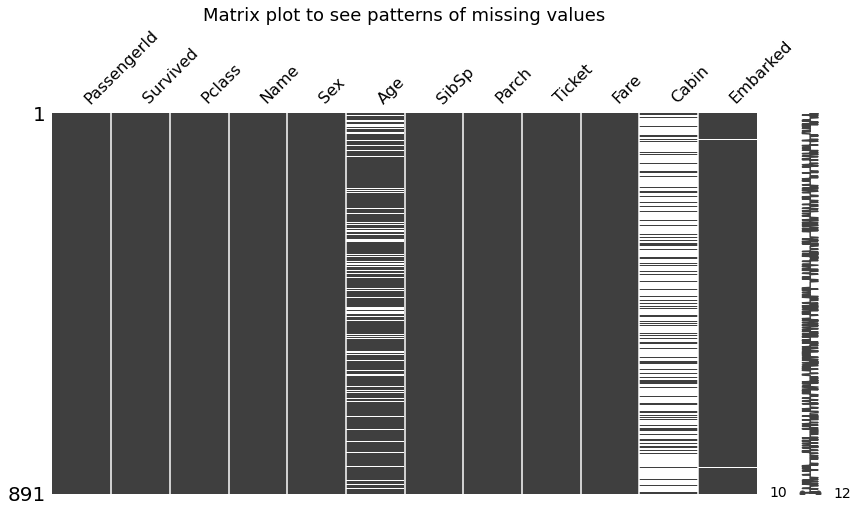

In [6]:
ms.matrix(Titanic_data, figsize=(14,7))
plt.title("Matrix plot to see patterns of missing values", size=18)

In [7]:
# Finding null values in the data

Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Handling missing values

#drop the "Cabin" column from the dataframe



In [9]:
Titanic_data = Titanic_data.drop(columns='Cabin',axis=1)

In [10]:
# replacing the missing values in "Age" column with mean value

Titanic_data["Age"].fillna(Titanic_data['Age'].mean(),inplace=True)

In [11]:
# Finding the mode value of "Embarked" column
print(Titanic_data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [12]:
print(Titanic_data["Embarked"].mode()[0])

S


In [13]:
# Replacing the missing value in "Embarked" column with the mode value

Titanic_data["Embarked"].fillna(Titanic_data["Embarked"].mode()[0], inplace=True)

In [14]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## All null values are filled  

## Data Analysis

In [15]:
# getting sum statistical measures about the data

Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# finding the number of people survived and not survived

Titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data Visualization

In [17]:
sns.set()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

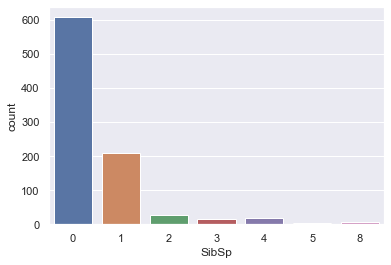

In [18]:
print(Titanic_data['SibSp'].value_counts())
sns.countplot(Titanic_data['SibSp'])

<AxesSubplot:>

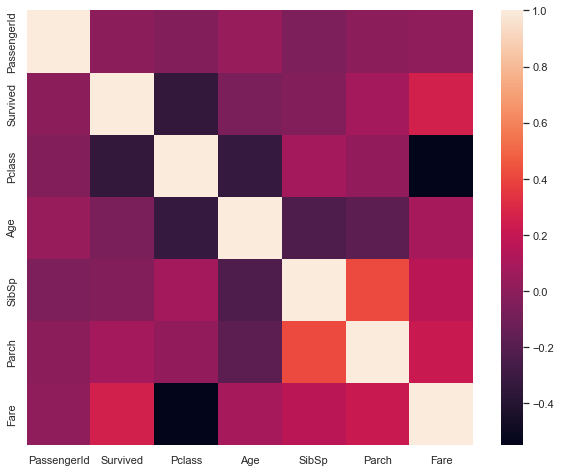

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(Titanic_data.corr())

# Here we can infer that survived column is moderately correlated to fare
# likewise moderately correlated to Fare,Parch,Embarked columns. 

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

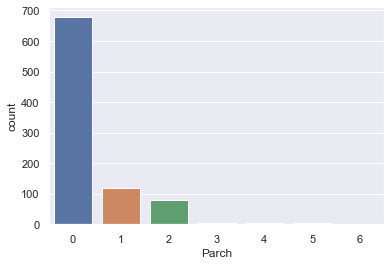

In [20]:
print((Titanic_data['Parch'].value_counts()/891)*100)
sns.countplot(Titanic_data['Parch'])

## Above info indicates that no. of people travelling alone were more

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.4344880940129925
0.9662793026645233


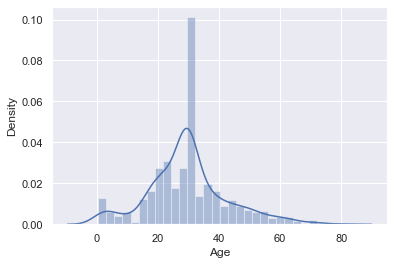

In [21]:
sns.distplot(Titanic_data['Age'])

print(Titanic_data['Age'].skew())

print(Titanic_data['Age'].kurt())

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

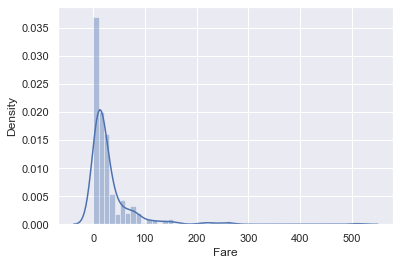

In [22]:
sns.distplot(Titanic_data["Fare"])

## Conclusion : Highly skewed data, a lot of people had cheaper tickets, Outliers are there in the data

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

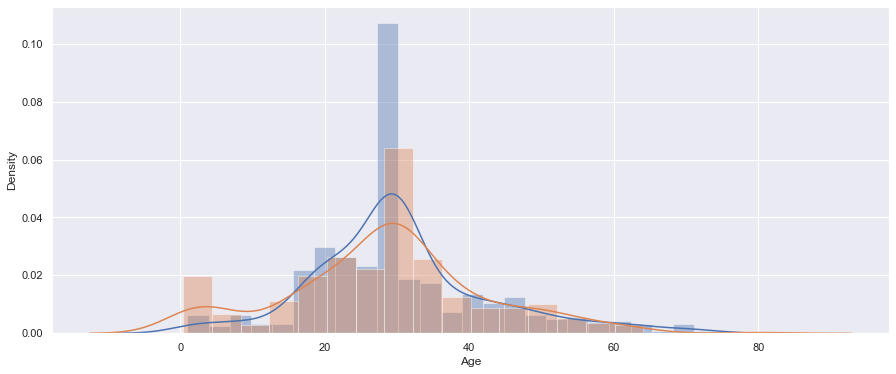

In [23]:
plt.figure(figsize=(15,6))
sns.distplot(Titanic_data[Titanic_data['Survived']==0]['Age'])
sns.distplot(Titanic_data[Titanic_data['Survived']==1]['Age'])

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

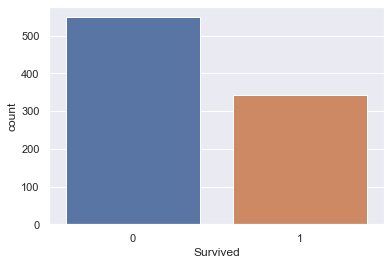

In [24]:
# making a count for "Survived" column
sns.countplot("Survived",data=Titanic_data)

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


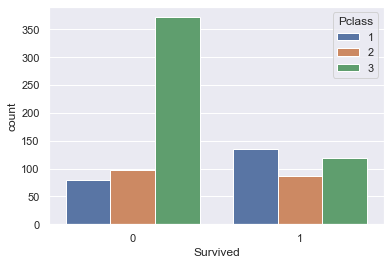

In [25]:
sns.countplot(Titanic_data['Survived'],hue=Titanic_data['Pclass'])

pd.crosstab(Titanic_data['Pclass'],Titanic_data['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

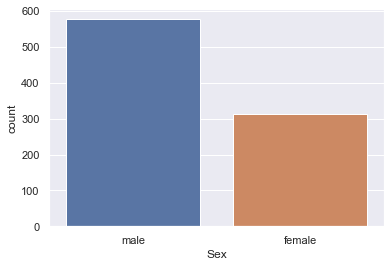

In [26]:
# making a count plot for "Sex" column 
sns.countplot ("Sex", data=Titanic_data )

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

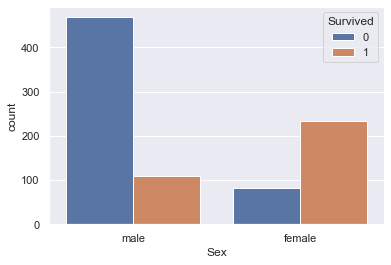

In [27]:
# number of survivors Gender wise
sns.countplot("Sex",hue="Survived", data=Titanic_data)

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

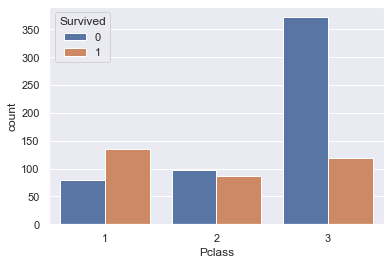

In [28]:
# making a count plot for "Pclass" column
sns.countplot('Pclass',hue="Survived", data=Titanic_data)

## Encoding the categorical columns 

In [29]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
Titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
Titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# Converting categorical Columns

Titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [33]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


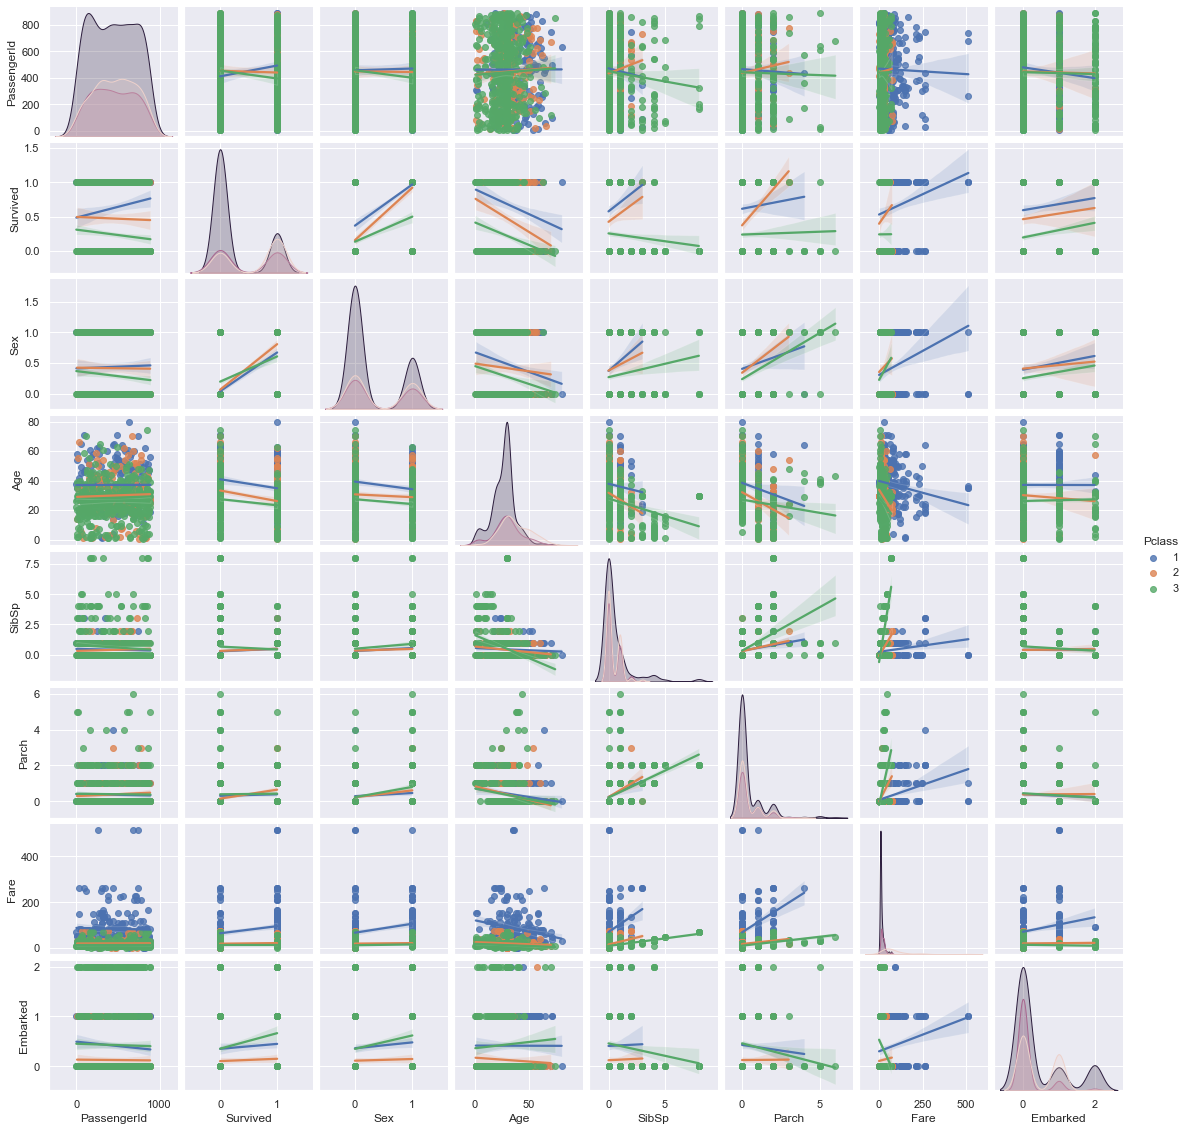

In [75]:
sns.pairplot(Titanic_data, kind = 'reg', hue='Pclass' ,size = 2)

## Separating features and target

In [35]:
X = Titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

In [36]:
Y = Titanic_data['Survived']

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


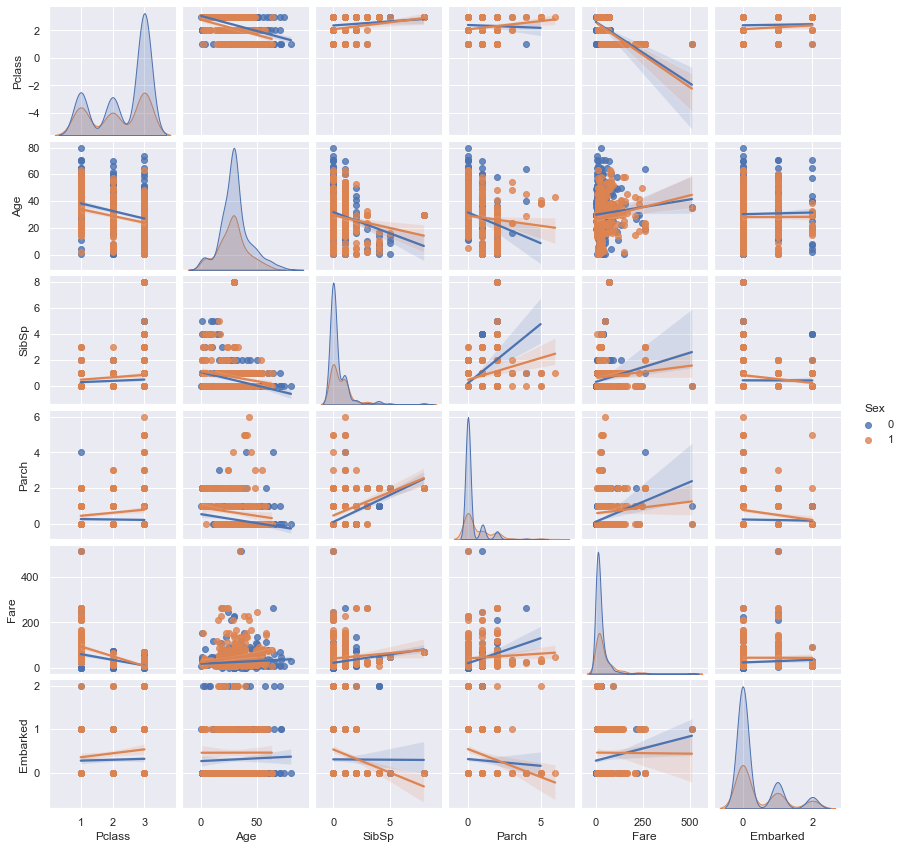

In [79]:
sns.pairplot(X, kind='reg', hue = "Sex",size = 2)

In [38]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [39]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Splitting the data into training and testing data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

## Logistic Regression

In [42]:
model = LogisticRegression()

In [43]:
# training the logistic regression model with training data 
model.fit(X_train, Y_train)

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

# Accuracy Score

In [44]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [45]:
print(X_train_prediction)

[0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 1 0 0 1 0 1 0 1 

In [46]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.800561797752809


# Accuracy on test data

In [47]:
X_test_prediction = model.predict(X_test)

In [48]:
print(X_test_prediction)

[0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0]


In [49]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7932960893854749


# Model Selection Techinique

In [50]:
models = [LogisticRegression(), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [51]:
def compare_models_train_test():
    for model in models:
        
        # Training the model
        model.fit(X_train, Y_train)
        
        #Evaluating the model
        test_data_prediction = model.predict(X_test)
        
        accuracy = accuracy_score(Y_test, test_data_prediction)
        print('Accuracy score of the ', model, '=', accuracy)
    
    

In [52]:
compare_models_train_test()

C:\Users\PANKAJ KHATIKKAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the  LogisticRegression() = 0.7932960893854749
Accuracy score of the  SVC(kernel='linear') = 0.776536312849162
Accuracy score of the  KNeighborsClassifier() = 0.7094972067039106
Accuracy score of the  RandomForestClassifier() = 0.8379888268156425


In [53]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=5,)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)

[0.79329609 0.78651685 0.79213483 0.76966292 0.8258427 ]
79.35


In [54]:
cv_score_SVC = cross_val_score(SVC(kernel='linear'),X,Y,cv=5)

print(cv_score_SVC)

mean_accuracy_SVC = sum(cv_score_SVC)/len(cv_score_SVC)
mean_accuracy_SVC = mean_accuracy_SVC*100
mean_accuracy_SVC = round(mean_accuracy_SVC,2)
print(mean_accuracy_SVC)

[0.80446927 0.80898876 0.78651685 0.75280899 0.78651685]
78.79


In [55]:
cv_score_KN = cross_val_score(KNeighborsClassifier(),X,Y,cv=5)

print(cv_score_KN)

mean_accuracy_KN = sum(cv_score_KN)/len(cv_score_KN)
mean_accuracy_KN = mean_accuracy_KN*100
mean_accuracy_KN = round(mean_accuracy_KN,2)
print(mean_accuracy_KN)

[0.60893855 0.65168539 0.70786517 0.71910112 0.71910112]
68.13


In [56]:
cv_score_RF = cross_val_score(RandomForestClassifier(),X,Y,cv=5)

print(cv_score_RF)

mean_accuracy_RF = sum(cv_score_RF)/len(cv_score_RF)
mean_accuracy_RF = mean_accuracy_RF*100
mean_accuracy_RF = round(mean_accuracy_RF,2)
print(mean_accuracy_RF)

[0.79888268 0.80337079 0.86516854 0.7752809  0.83707865]
81.6


## Clearly we can see that after cross validation Random Forest Classifier model has the Highest Accuracy hence we can use random Forest Model.